In [28]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [44]:
IMAGE_SHAPE = (224,224)
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape = IMAGE_SHAPE+(3,))
])

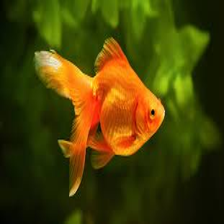

In [39]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [40]:
gold_fish = np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [41]:
gold_fish[np.newaxis].shape

(1, 224, 224, 3)

In [45]:
results = model.predict(gold_fish[np.newaxis])
results.shape

(1, 1001)

In [46]:
y_p = np.argmax(results)
y_p

2

In [47]:
with open("ImageNetLabels.txt") as f:
    image_label = f.read().splitlines()


In [54]:
image_label[y_p]

'goldfish'

In [57]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir = '.',untar=True)

In [58]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [59]:
images_count = len(list(data_dir.glob('*/*.jpg')))
images_count

3670

In [60]:
roses = list(data_dir.glob('roses/*'))

In [61]:
flower_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [62]:
flower_labels_dict = {
    'roses' : 0,
    'dandelion' : 2,
    'daisy' : 1,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [63]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [74]:
cv2.resize(img,(IMAGE_SHAPE)).shape

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Expected sequence length 2, got 3
>  - Can't parse 'dsize'. Expected sequence length 2, got 3


In [75]:
X,y = [],[]
for flower_name,images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_image)
        y.append(flower_labels_dict[flower_name])

In [76]:
X = np.array(X)
y = np.array(y)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [78]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [79]:
feature_extraction_model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",input_shape=(224,224,3),
                   trainable=False)])

In [80]:
model = keras.Sequential([
    feature_extraction_model,
    layers.Dense(5)
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_8 (Sequential)    (None, 1280)              2257984   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [84]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']) 
model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
92/92 [==============================] - 99s 958ms/step - loss: 1.6133 - accuracy: 0.3021
Epoch 2/5
92/92 [==============================] - 89s 964ms/step - loss: 1.6094 - accuracy: 0.2994
Epoch 3/5
92/92 [==============================] - 90s 974ms/step - loss: 1.6094 - accuracy: 0.2994
Epoch 4/5
92/92 [==============================] - 91s 994ms/step - loss: 1.6094 - accuracy: 0.2994
Epoch 5/5
92/92 [==============================] - 91s 988ms/step - loss: 1.6094 - accuracy: 0.2994


In [85]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 23s 957ms/step - loss: 1.6094 - accuracy: 0.2984


[1.6094377040863037, 0.29836511611938477]